<a href="https://www.kaggle.com/code/mosesmoncy/new-york-stock-exchange-volume-prediction?scriptVersionId=126875902" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

The NYSE(New York Stock Exchange) is a stock exchange where the equity shares of public companies are bought and sold. The NYSE uses an auction-based system in which brokers auction shares of stock for the highest price they can get, either on a physical trading floor or an electronic system.

The New York Stock Exchange has two primary functions: It provides a central marketplace for investors to buy and sell stock. It enables companies to list their shares and raise capital from interested investors.

The New York Stock Exchange is the largest stock exchange in the world, with an equity market capitalization of nearly 23 trillion U.S. dollars as of December 2022.

Volume in the stock market means the total number of shares traded in a specified time frame. This would include every share that is bought and sold during the time period in review.

Here, the model is created to evaluate the 'volume' of the stocks using regression models according to the date, symbol, open, close, low and high.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [2]:
a=pd.read_csv('/kaggle/input/price-split-dataset/prices-split-adjusted.csv')
a

,date,symbol,open,close,low,high,volume
0,2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0
...,...,...,...,...,...,...,...
851259,2016-12-30,ZBH,103.309998,103.199997,102.849998,103.930000,973800.0
851260,2016-12-30,ZION,43.070000,43.040001,42.689999,43.310001,1938100.0
851261,2016-12-30,ZTS,53.639999,53.529999,53.270000,53.740002,1701200.0
851262,2016-12-30,AIV,44.730000,45.450001,44.410000,45.590000,1380900.0


In [3]:
# read first five data
a.head()

,date,symbol,open,close,low,high,volume
0,2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


In [4]:
# read last five data
a.tail()

,date,symbol,open,close,low,high,volume
851259,2016-12-30,ZBH,103.309998,103.199997,102.849998,103.930000,973800.0
851260,2016-12-30,ZION,43.070000,43.040001,42.689999,43.310001,1938100.0
851261,2016-12-30,ZTS,53.639999,53.529999,53.270000,53.740002,1701200.0
851262,2016-12-30,AIV,44.730000,45.450001,44.410000,45.590000,1380900.0
851263,2016-12-30,FTV,54.200001,53.630001,53.389999,54.480000,705100.0


In [5]:
a.describe

<bound method NDFrame.describe of               date symbol        open       close         low        high  \
0       2016-01-05   WLTW  123.430000  125.839996  122.309998  126.250000   
1       2016-01-06   WLTW  125.239998  119.980003  119.940002  125.540001   
2       2016-01-07   WLTW  116.379997  114.949997  114.930000  119.739998   
3       2016-01-08   WLTW  115.480003  116.620003  113.500000  117.440002   
4       2016-01-11   WLTW  117.010002  114.970001  114.089996  117.330002   
...            ...    ...         ...         ...         ...         ...   
851259  2016-12-30    ZBH  103.309998  103.199997  102.849998  103.930000   
851260  2016-12-30   ZION   43.070000   43.040001   42.689999   43.310001   
851261  2016-12-30    ZTS   53.639999   53.529999   53.270000   53.740002   
851262  2016-12-30    AIV   44.730000   45.450001   44.410000   45.590000   
851263  2016-12-30    FTV   54.200001   53.630001   53.389999   54.480000   

           volume  
0       2163600.0  
1

In [6]:
a.isna().sum()

date      0
symbol    0
open      0
close     0
low       0
high      0
volume    0
dtype: int64

In [7]:
a.dtypes

date       object
symbol     object
open      float64
close     float64
low       float64
high      float64
volume    float64
dtype: object

In [8]:
a['date'] =pd.to_datetime(a['date'])

In [9]:
a["Year"] = a['date'].dt.year
a["month"] = a['date'].dt.month
a["day"] = a['date'].dt.day

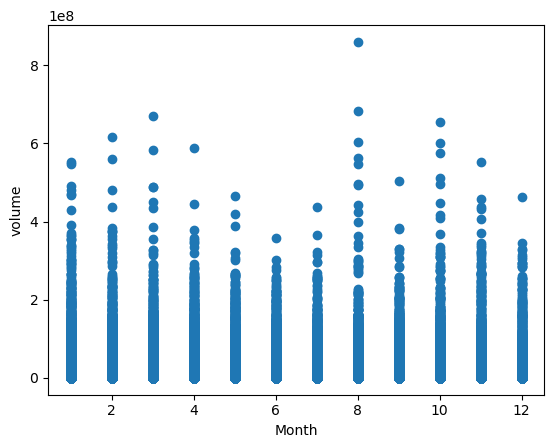

In [10]:
month = a["month"]
volume  = a['volume']
plt.xlabel('Month')
plt.ylabel('volume')
plt.scatter(month , volume)
plt.show()

Augest has the best stock volume result followed by March

<AxesSubplot:>

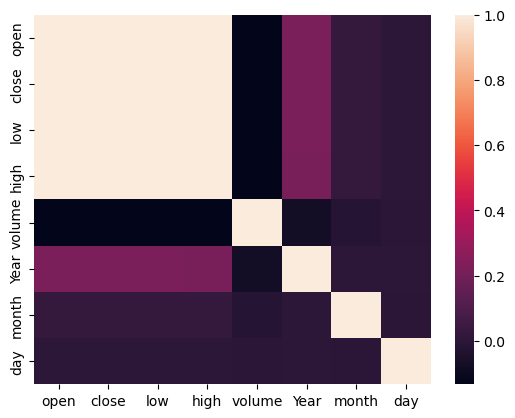

In [11]:
sns.heatmap(a.corr())

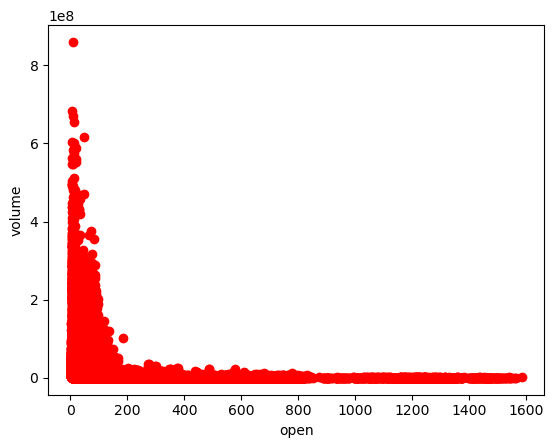

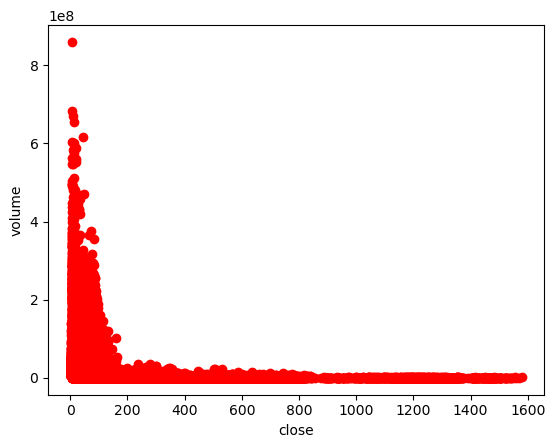

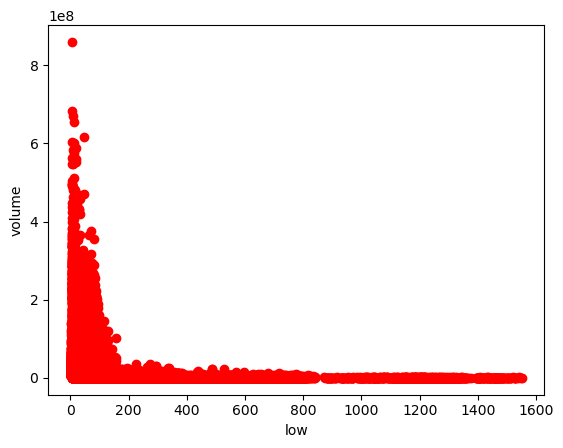

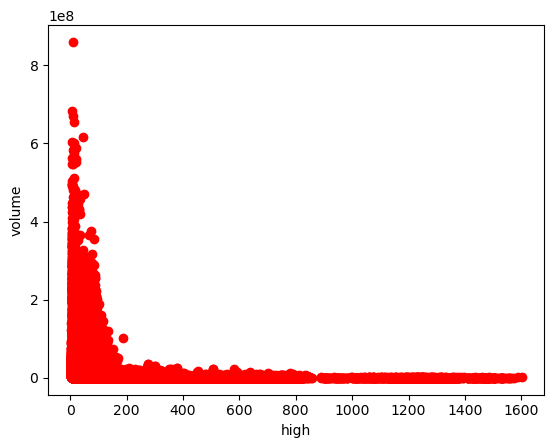

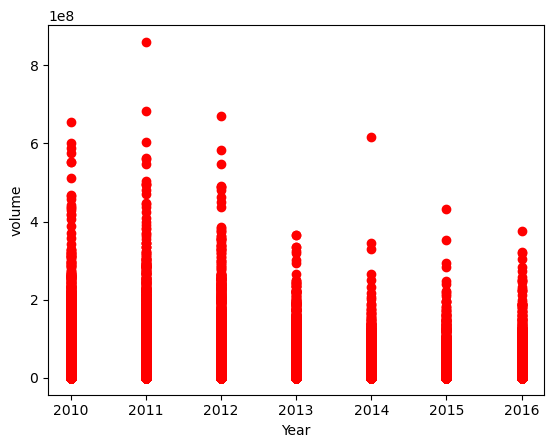

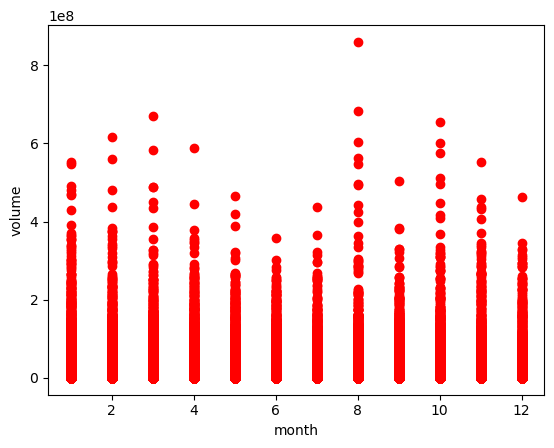

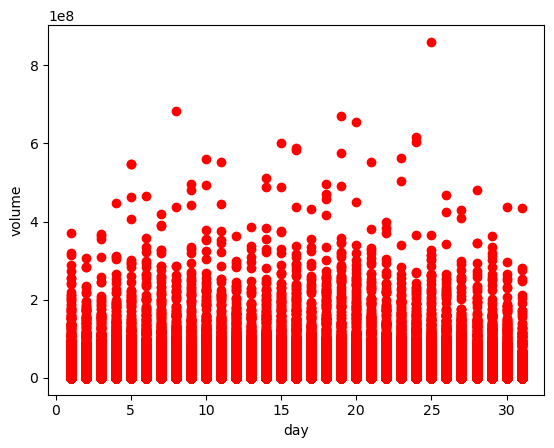

In [12]:
col=[ 'open', 'close', 'low', 'high', 'Year',
       'month', 'day']
for i in col:
    plt.xlabel(i)
    plt.ylabel("volume")
    plt.scatter(a[i],a["volume"],color='red')
    plt.show()

**'open', 'close', 'low', 'high' has the same affect on volume...

2011 was the year where volume stocks went higher

days from 22 to 25 marks the high volume stocks**



<AxesSubplot:xlabel='day', ylabel='Count'>

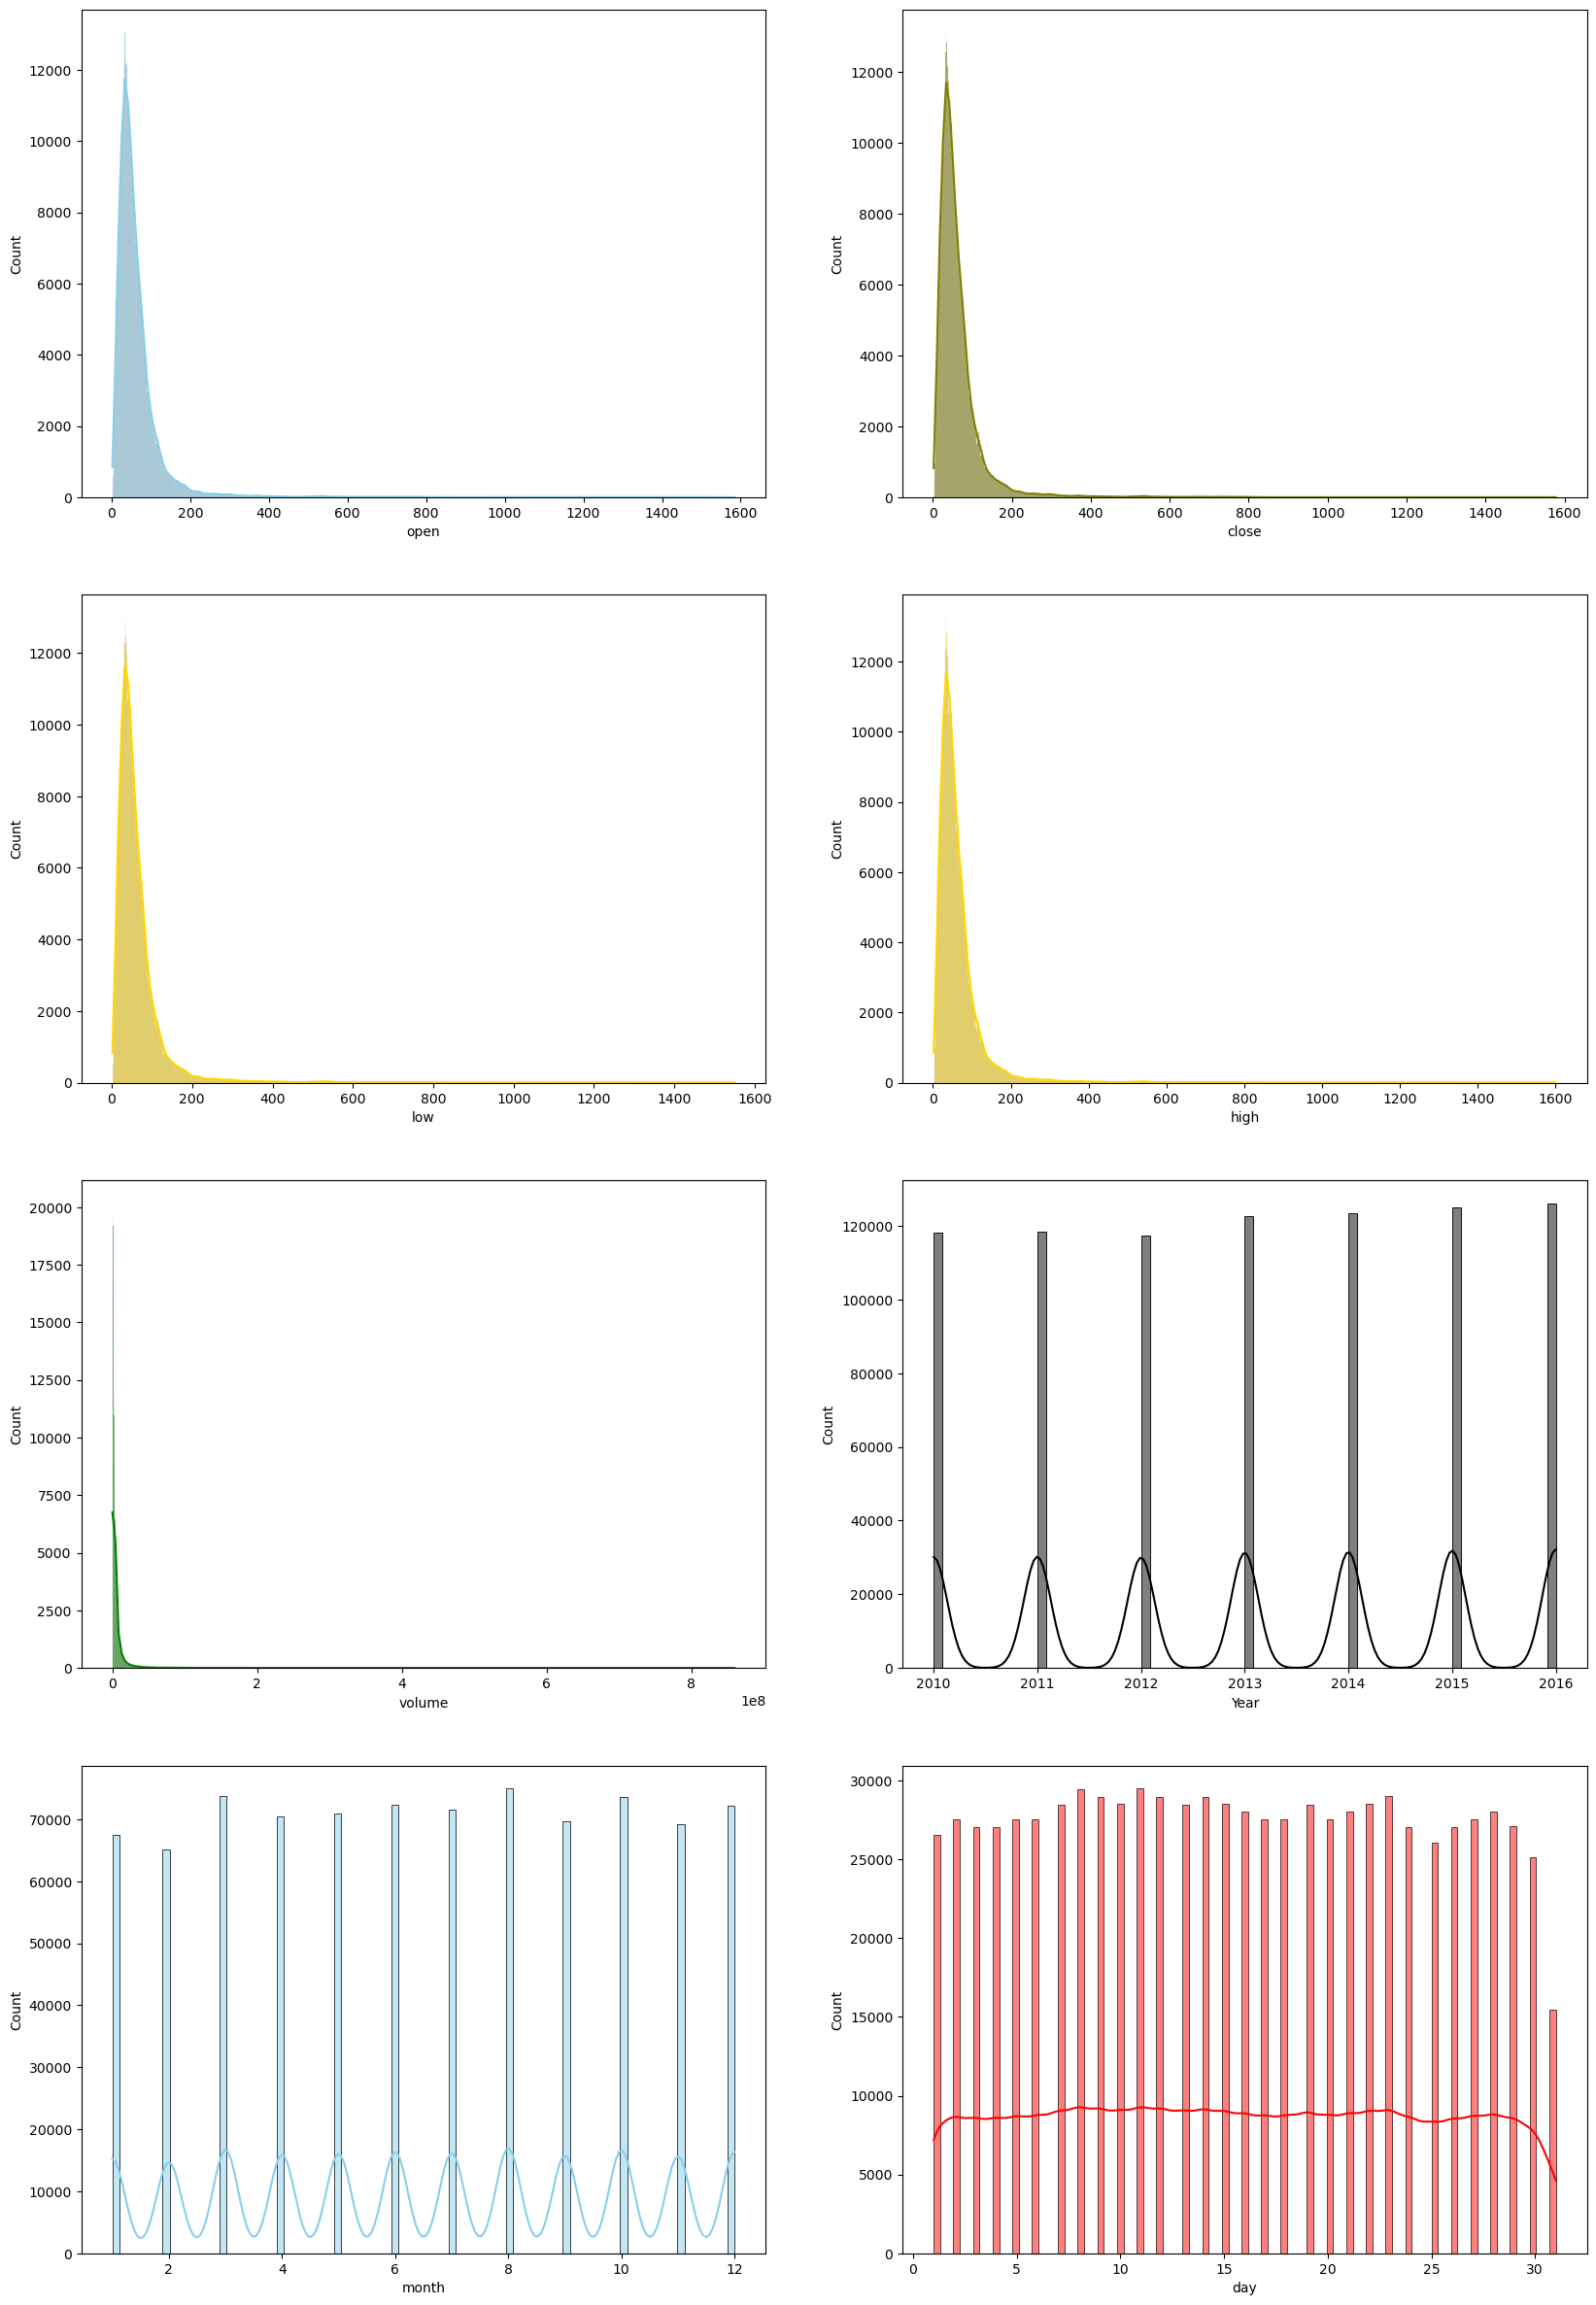

In [13]:
fig, axs = plt.subplots(4,2, figsize=(20,30))
sns.histplot(data=a['open'], kde=True, color="skyblue", ax=axs[0, 0])
sns.histplot(data=a['close'], kde=True, color="olive", ax=axs[0, 1])
sns.histplot(data=a['low'], kde=True, color="gold", ax=axs[1, 0])
sns.histplot(data=a['high'], kde=True, color="gold", ax=axs[1, 1])
sns.histplot(data=a['volume'], kde=True, color="green", ax=axs[2, 0])
sns.histplot(data=a['Year'], kde=True, color="black", ax=axs[2, 1])
sns.histplot(data=a['month'], kde=True, color="skyblue", ax=axs[3, 0])
sns.histplot(data=a['day'], kde=True, color="red",ax=axs[3,1])

In [14]:
a['symbol'].value_counts()

KSU     1762
NOC     1762
ORCL    1762
OMC     1762
OKE     1762
        ... 
KHC      378
HPE      304
CSRA     284
WLTW     251
FTV      126
Name: symbol, Length: 501, dtype: int64

In [15]:
# dropping 'data'

a=a.drop(['date'],axis=1)


In [16]:
a

,symbol,open,close,low,high,volume,Year,month,day
0,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0,2016,1,5
1,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0,2016,1,6
2,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0,2016,1,7
3,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0,2016,1,8
4,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0,2016,1,11
...,...,...,...,...,...,...,...,...,...
851259,ZBH,103.309998,103.199997,102.849998,103.930000,973800.0,2016,12,30
851260,ZION,43.070000,43.040001,42.689999,43.310001,1938100.0,2016,12,30
851261,ZTS,53.639999,53.529999,53.270000,53.740002,1701200.0,2016,12,30
851262,AIV,44.730000,45.450001,44.410000,45.590000,1380900.0,2016,12,30


In [17]:
# since 'symbol' has categorical data

from sklearn.preprocessing import LabelEncoder
la=LabelEncoder()
cols=['symbol']
a[cols]=a[cols].apply(la.fit_transform)

In [18]:
# splitting x(inputs) and y(outputs)

x=a.drop(['volume'],axis=1)
y=a["volume"]
x

,symbol,open,close,low,high,Year,month,day
0,479,123.430000,125.839996,122.309998,126.250000,2016,1,5
1,479,125.239998,119.980003,119.940002,125.540001,2016,1,6
2,479,116.379997,114.949997,114.930000,119.739998,2016,1,7
3,479,115.480003,116.620003,113.500000,117.440002,2016,1,8
4,479,117.010002,114.970001,114.089996,117.330002,2016,1,11
...,...,...,...,...,...,...,...,...
851259,498,103.309998,103.199997,102.849998,103.930000,2016,12,30
851260,499,43.070000,43.040001,42.689999,43.310001,2016,12,30
851261,500,53.639999,53.529999,53.270000,53.740002,2016,12,30
851262,21,44.730000,45.450001,44.410000,45.590000,2016,12,30


In [19]:
y

0         2163600.0
1         2386400.0
2         2489500.0
3         2006300.0
4         1408600.0
            ...    
851259     973800.0
851260    1938100.0
851261    1701200.0
851262    1380900.0
851263     705100.0
Name: volume, Length: 851264, dtype: float64

In [20]:
# Implementing Training and Testing

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

x_train

,symbol,open,close,low,high,Year,month,day
738390,27,63.270000,62.980000,62.889999,63.939999,2016,2,10
343534,16,10.150000,10.400000,10.120000,10.400000,2012,11,28
520201,131,37.869187,37.332654,37.276444,38.027592,2014,5,9
253766,18,47.500000,46.900002,46.790001,47.750000,2012,2,24
169554,432,47.060001,46.860001,46.520000,47.070000,2011,6,8
...,...,...,...,...,...,...,...,...
259178,275,33.139999,33.200001,32.959999,33.240002,2012,3,12
365838,413,94.839996,95.250000,94.180000,95.599998,2013,2,5
131932,408,49.799999,51.779999,49.650002,51.959999,2011,2,11
671155,23,47.119999,47.900002,47.119999,48.270000,2015,7,29


In [21]:
y_train

738390    2987500.0
343534    4244900.0
520201    3214300.0
253766    2904600.0
169554    7939200.0
            ...    
259178    1412800.0
365838     344000.0
131932    1666600.0
671155    1510200.0
121958    1954000.0
Name: volume, Length: 595884, dtype: float64

In [22]:
# Preprocessing Steps

from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()

scalar.fit(x_train)

x_train=scalar.fit_transform(x_train)
x_test-scalar.fit_transform(x_test)

,symbol,open,close,low,high,Year,month,day
763664,351.284950,56.810483,57.096848,56.743502,57.370597,2014.527534,4.748622,21.283154
751657,320.499078,12.768919,13.124430,12.629040,13.195225,2014.527534,4.040761,17.740759
80492,128.832199,11.683666,11.644542,11.563664,11.843421,2011.524357,8.287931,8.884773
280186,123.866736,48.485705,47.858229,47.720237,48.614032,2012.525416,5.456484,15.083963
176852,194.376313,73.967350,74.391805,73.700742,74.855248,2012.024887,6.164346,28.367944
...,...,...,...,...,...,...,...,...
725355,464.497511,100.536332,99.490714,99.407870,100.796064,2014.027004,10.411516,29.253542
287466,368.167525,50.150972,51.093432,50.129294,51.100003,2012.525416,6.164346,7.113575
16879,265.878983,51.334886,51.769248,50.686643,51.854842,2011.524357,3.332899,23.054352
679925,346.319487,69.882851,69.202335,69.192622,70.770228,2014.027004,7.580069,20.397556


In [23]:
# Linear Regression model creation

model=LinearRegression()
model.fit(x_train,y_train)

y_pred=model.predict(x_test)
y_pred
print('Mean Absolute Error is',mean_absolute_error(y_test,y_pred))
print('Mean Squared Error is',mean_squared_error(y_test,y_pred))
mse=mean_squared_error(y_test,y_pred)
rsme=np.sqrt(mse)
print('Root Mean Square Error is',rsme)

Mean Absolute Error is 1408590077.9154258
Mean Squared Error is 1.9992417094868913e+18
Root Mean Square Error is 1413945440.7744632


In [24]:
# Creating Decision Tree Regression 

tree=DecisionTreeRegressor()
tree.fit(x_train,y_train)

y_pred=tree.predict(x_test)

print('Mean Absolute Error is',mean_absolute_error(y_test,y_pred))
print('Mean Squared Error is',mean_squared_error(y_test,y_pred))
mse=mean_squared_error(y_test,y_pred)
rsme=np.sqrt(mse)
print('Root Mean Square Error is',rsme)

Mean Absolute Error is 8072175.745947216
Mean Squared Error is 179562555488109.97
Root Mean Square Error is 13400095.353694689


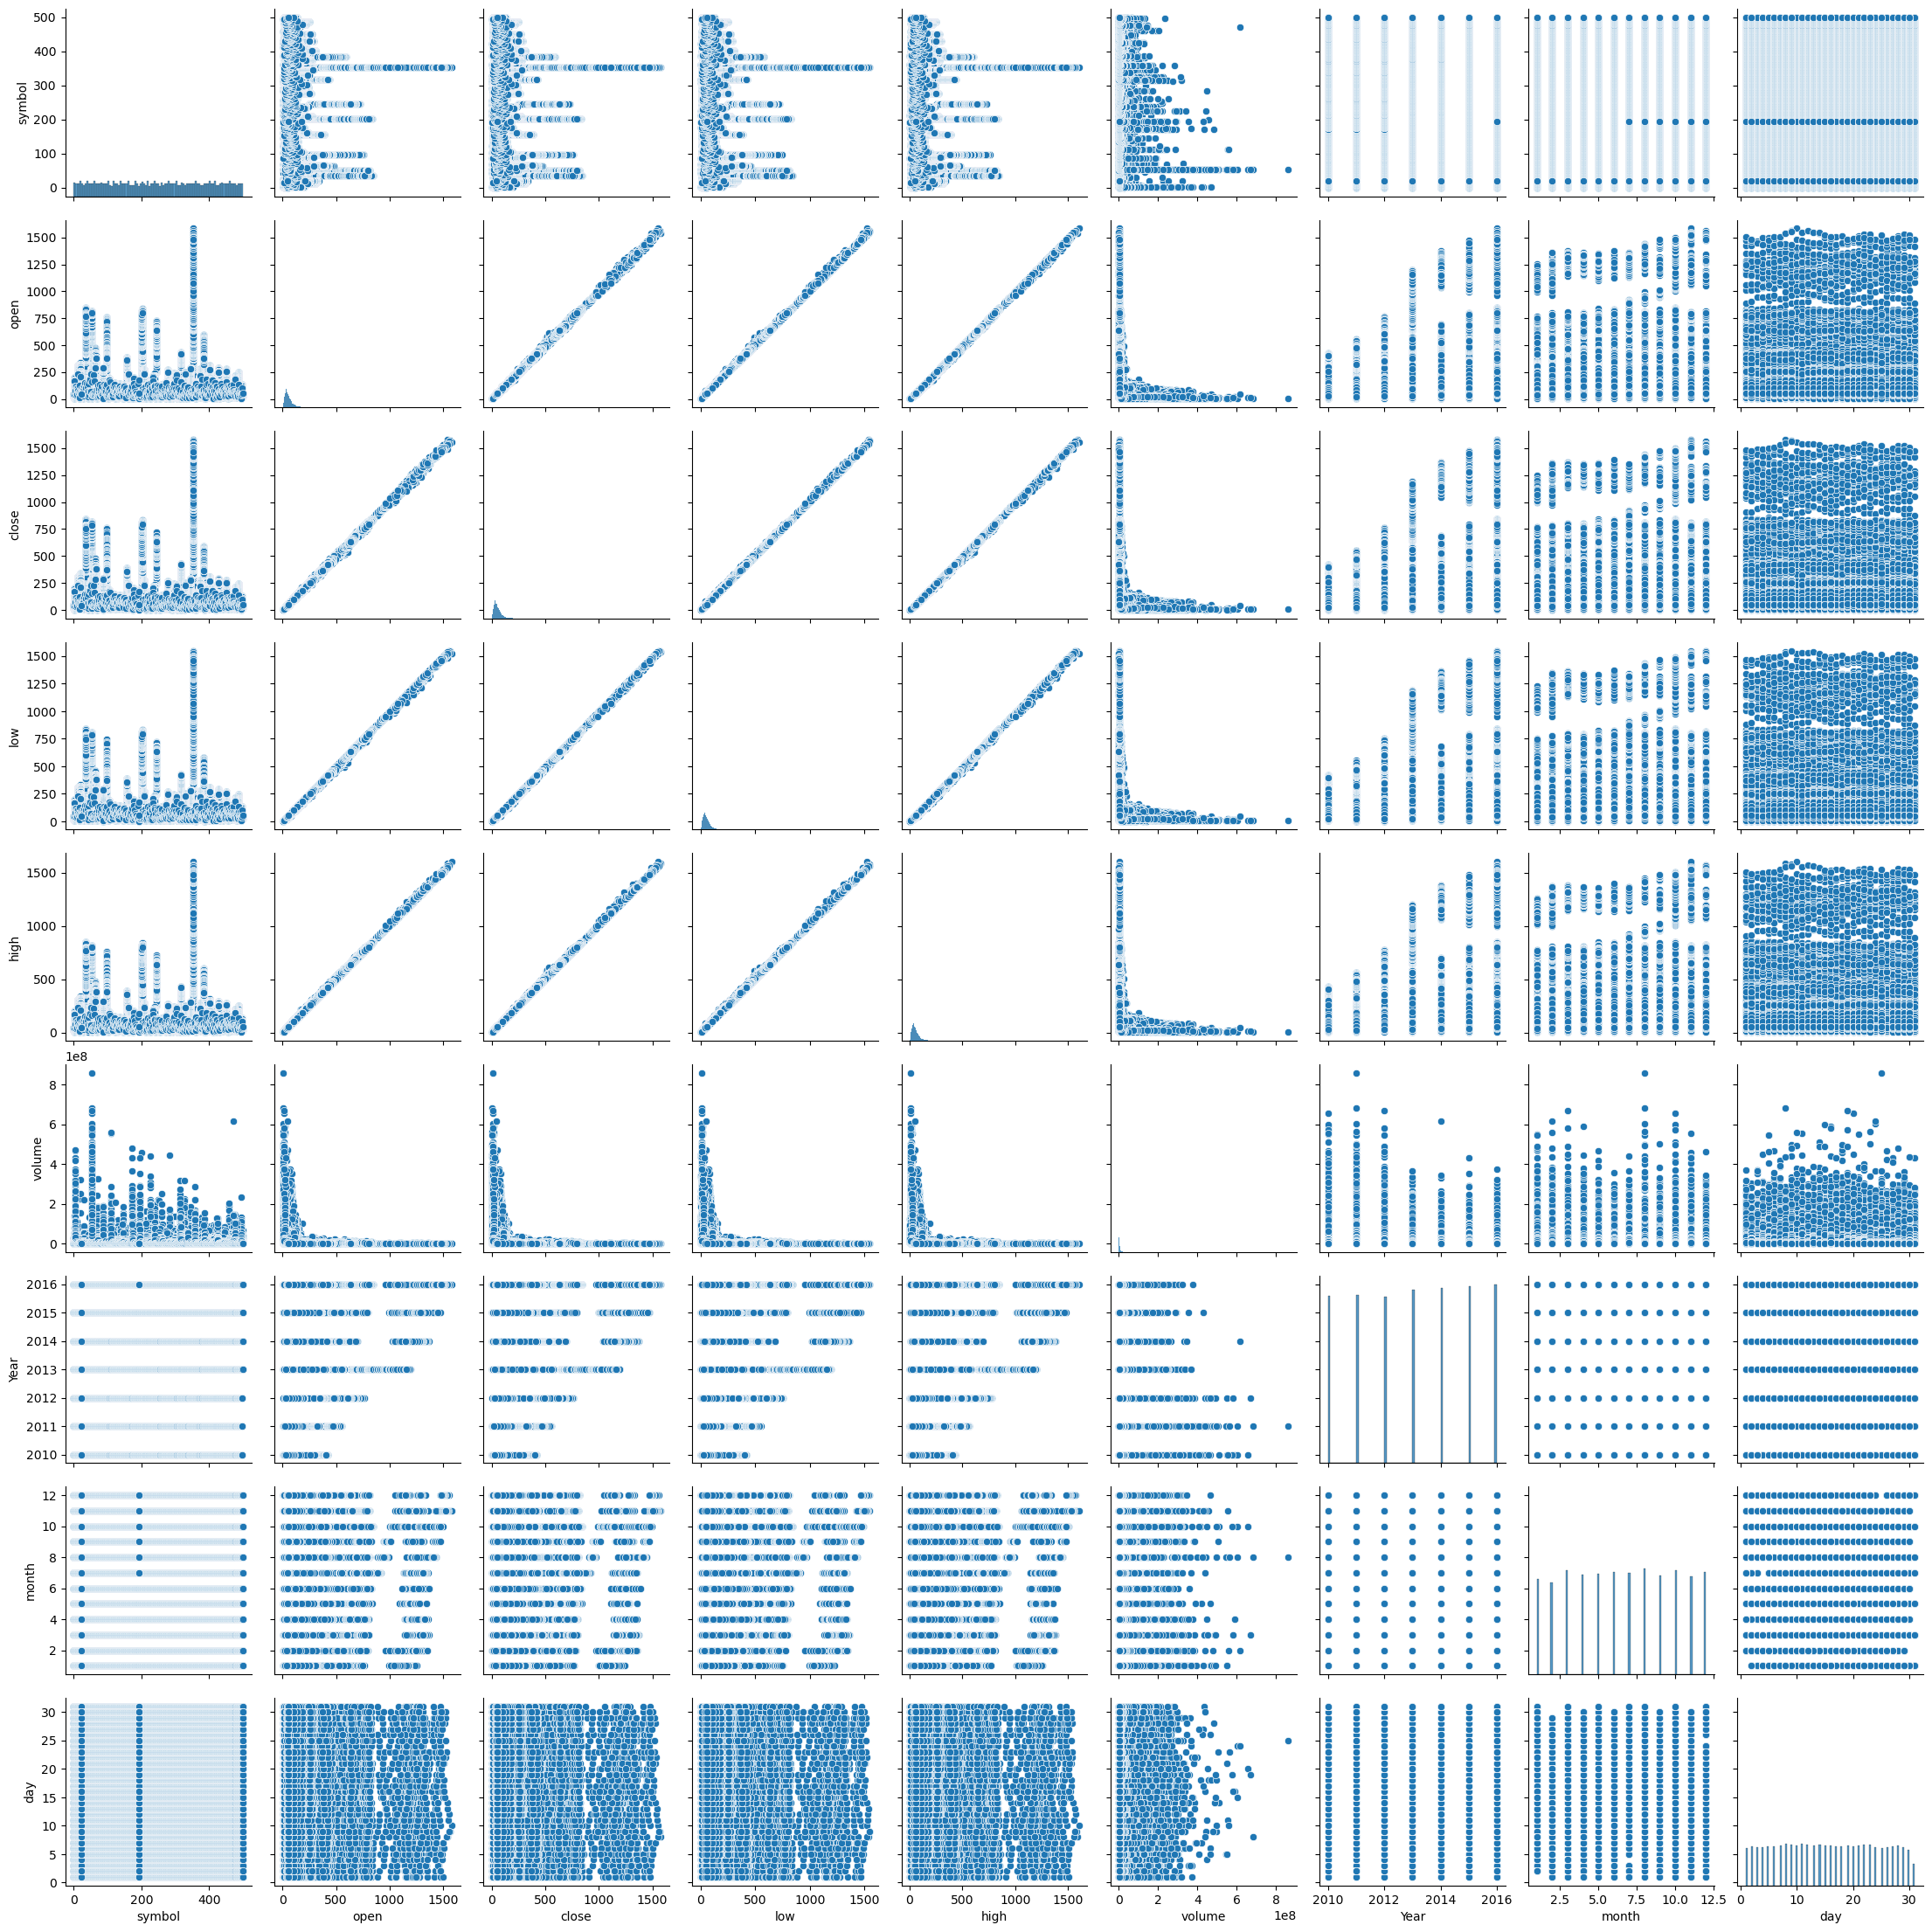

In [25]:
sns.pairplot(a)